# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [2]:
# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
    sig = 1.+np.arctan(mean-1)/np.pi
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 


### (2) Define set of hypothesis

In [11]:
# Considered values of true mean

# vmean = np.linspace(0.,6.0,13)
vmean = np.linspace(0.,6.0,121)
# vmean = np.linspace(0.,6.0,601)

CL = 0.95            # One sided! So the inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)


### (3)  Print interval information

In [12]:
print("\nProbability intervals for x:")

print("\n  true mean     x_low     x_high")

for im in range(vmean.size) :
    print ("%10.3f   %8.3f  %8.3f" % (vmean[im],vlow[im],vhig[im]))



Probability intervals for x:

  true mean     x_low     x_high
     0.000     -1.234     1.234
     0.050     -1.197     1.297
     0.100     -1.161     1.361
     0.150     -1.126     1.426
     0.200     -1.092     1.492
     0.250     -1.058     1.558
     0.300     -1.025     1.625
     0.350     -0.993     1.693
     0.400     -0.962     1.762
     0.450     -0.932     1.832
     0.500     -0.902     1.902
     0.550     -0.873     1.973
     0.600     -0.846     2.046
     0.650     -0.819     2.119
     0.700     -0.792     2.192
     0.750     -0.767     2.267
     0.800     -0.742     2.342
     0.850     -0.717     2.417
     0.900     -0.693     2.493
     0.950     -0.669     2.569
     1.000     -0.645     2.645
     1.050     -0.621     2.721
     1.100     -0.597     2.797
     1.150     -0.573     2.873
     1.200     -0.548     2.948
     1.250     -0.523     3.023
     1.300     -0.497     3.097
     1.350     -0.471     3.171
     1.400     -0.444     3.244
     1.4

### (4) Draw probability intervals

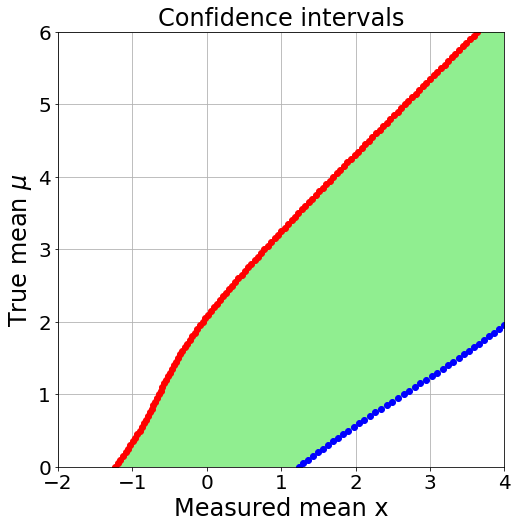

In [13]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_1.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [14]:
Xm = 2.3

# Look for limit point in the probability interval tables

iuh = np.argmax(Xm < vhig)
iul = np.argmax(Xm < vlow)

# Interpolate between points for higher precision (linear interpolation)

frac = (Xm-vlow[iul-1])/(vlow[iul]-vlow[iul-1])
ul=frac*vmean[iul]+(1-frac)*vmean[iul-1]
print('Upper limit : %.4f' % (ul))

frac = (Xm-vhig[iuh-1])/(vhig[iuh]-vhig[iuh-1])
ll = frac*vmean[iuh]+(1-frac)*vmean[iuh-1]
print('Lower limit : %.4f' % (ll))

Upper limit : 4.6264
Lower limit : 0.7723


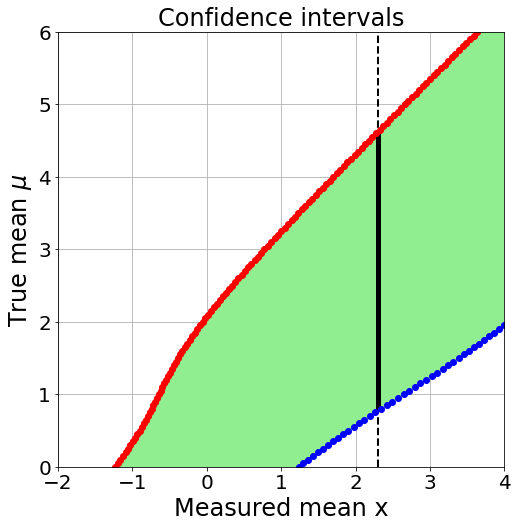

In [15]:
plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,ll,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_2.png'
plt.savefig(fname)
